# Using Python to do some basic analysis
This practice is a bisic analysis practice with the [vgsales data set from Kaggle](https://www.kaggle.com/kedokedokedo/vgsales).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
vgsales = pd.read_csv('vgsales.csv')

In [3]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vgsales.drop('Rank', axis=1, inplace=True)

In [6]:
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


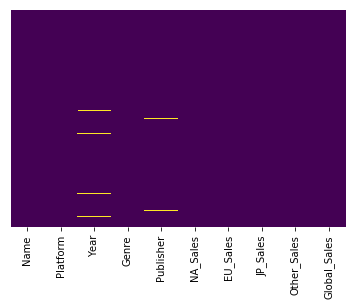

In [7]:
#Checking if there is any null value in the dataframe

sns.heatmap(vgsales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#cleaning the dataframe

vgsales.dropna(inplace=True)

In [9]:
vgsales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [10]:
by_Gen = vgsales.groupby('Genre').size()
print(by_Gen.head())

Genre
Action       3251
Adventure    1274
Fighting      836
Misc         1686
Platform      875
dtype: int64


In [11]:
#Showing top 3 video game's publisher

vgsales['Publisher'].value_counts().head(3)

Electronic Arts       1339
Activision             966
Namco Bandai Games     928
Name: Publisher, dtype: int64

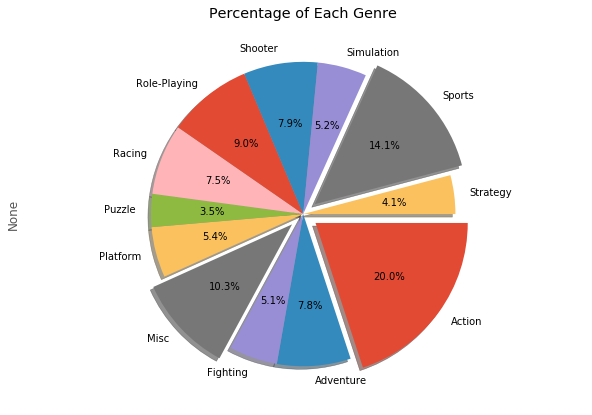

In [12]:
#Showing the percentage of each Genre

plt.style.use('ggplot')
plt.axis('equal')

by_Gen.plot(kind='pie', autopct='%.1f%%', title='Percentage of Each Genre', figsize=(10,7), grid=True, shadow=True,
           explode=[0.1,0,0,0.1,0,0,0,0,0,0,0.1,0], counterclock=False)

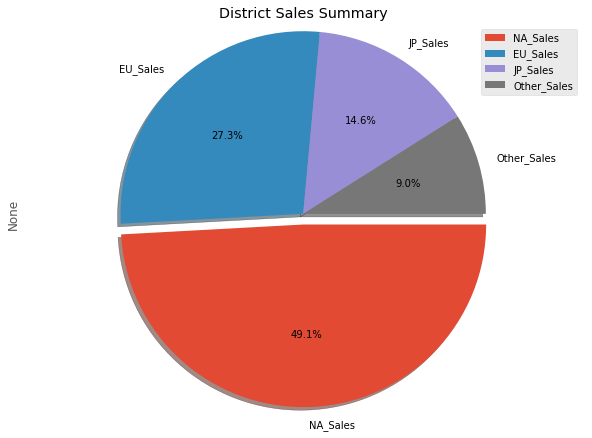

In [13]:
#Showing Sales Percentage of four district

plt.style.use('ggplot')
plt.axis('equal')
vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot(kind='pie', autopct='%.1f%%', title='District Sales Summary', figsize=(10,7), 
                                                                        grid=True, shadow=True, explode=[0.07,0,0,0], counterclock=False, radius=1.2)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], loc=0)

In [14]:
by_Y = vgsales.groupby('Year')

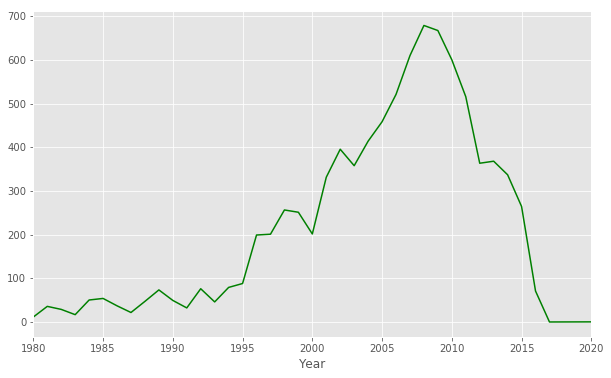

In [15]:
#Showing the trend of Global Sales

by_Y['Global_Sales'].sum().plot(kind='line', figsize=(10,6), c='g')